## 0. Get data
To run the code behind, the data location is in: 
* Modeling_Semantic_Plausibility/Data/pap, 
* Modeling_Semantic_Plausibility/Data/pep-3k

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from data_wrong_analysis import DataAnalysis_wrong, Abstractness_wrong

In [2]:
with open('pap_preds.txt', 'r') as f:
    pap_preds = eval(f.read())

pap_list_wrong = []

for i in pap_preds:
    if pap_preds[i]['preds'] != pap_preds[i]['original_labels']:
        pap_temp = []
        pap_temp.append(str(pap_preds[i]['original_labels']))
        pap_temp.append(i)
        pap_list_wrong.append(pap_temp)
print(pap_list_wrong)

[['1', 'growth implies ground'], ['1', 'descriptor finds forest'], ['1', 'guest watches detonation'], ['1', 'memory improves fitness'], ['0', 'household finds tadpole'], ['0', 'pun develops mystery'], ['1', 'philosopher compares convenience'], ['1', 'elephant bounces tip'], ['0', 'method considers manifestation'], ['1', 'attendee disengages norm'], ['0', 'airship provides compliance'], ['0', 'apple encrypts service'], ['0', 'child realizes bee'], ['0', 'ceremony distributes book'], ['0', 'journalist pinpoints attainment'], ['1', 'choice treats water'], ['0', 'preoccupation emphasizes construction'], ['0', 'escalation guarantees famine'], ['0', 'gardening mentions bean'], ['1', 'ratio outnumbers name'], ['1', 'army rediscovers shotgun'], ['0', 'couple finds cockroach'], ['1', 'fortitude bolsters reputation'], ['1', 'newspaper stimulates tradition']]


## 1. basic analysis

In [3]:
data_set_pap=DataAnalysis_wrong(pap_list_wrong)

In [4]:
print('pap:number of rows and columns, number of classes')
print('pap:',data_set_pap.dataset_statistics,data_set_pap.classes_num)

pap:number of rows and columns, number of classes
pap: [24, 2] {'0': 12, '1': 12}


# 2. tokens analysis (word counts)

## 2.1 tokens number

In [5]:
print('pap:total_tokens, num_unique_tokens')
print('pap:',len(data_set_pap.all_tokens),data_set_pap.num_unique_tokens)

pap:total_tokens, num_unique_tokens
pap: 72 70


pap:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


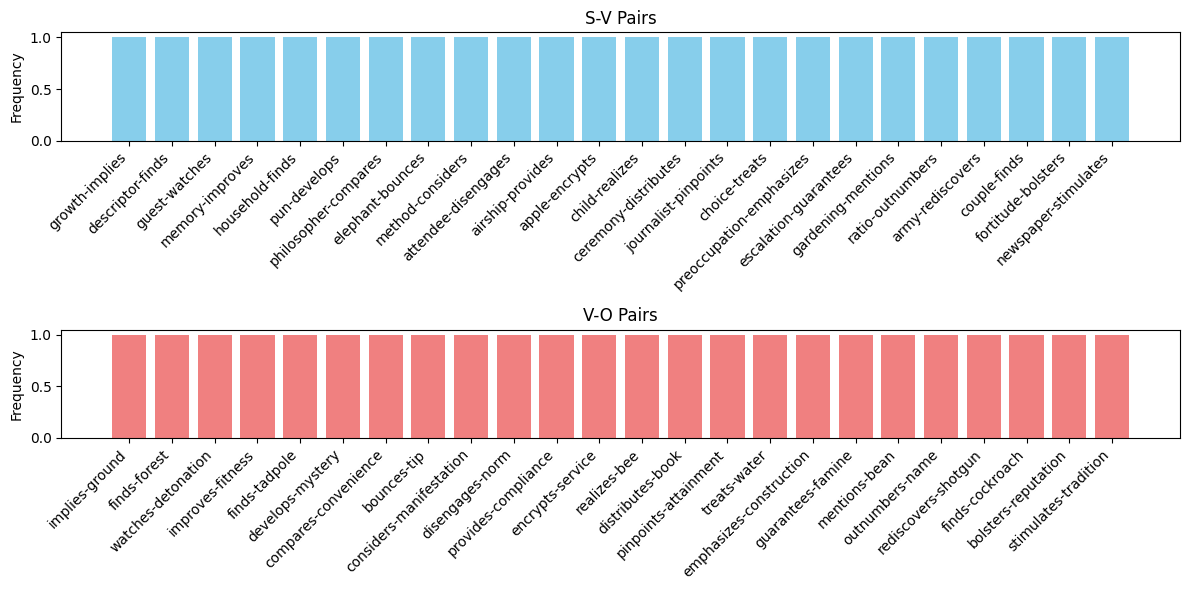

In [6]:
print('pap:number of token pairs')
data_set_pap.plot_tokens_bi_distribution(50)

# 3.POS analysis

## 3.1 unigram pos

In [7]:
print('pap:unique_pos')
print(len(data_set_pap.unique_pos)) #18


pap:unique_pos
7


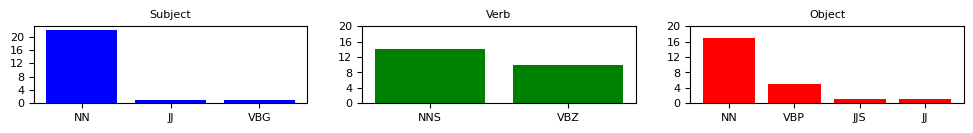

In [8]:
data_set_pap.plot_pos_uni_distribution()

## 3.2 bigram pos

In [9]:
pos1=data_set_pap.pos_bigrams_counts

In [10]:
print(pos1)

{'NN NNS': 12, 'NN VBZ': 10, 'NNS NN': 9, 'VBZ NN': 8, 'NNS VBP': 5, 'VBZ JJS': 1, 'VBZ JJ': 1, 'JJ NNS': 1, 'VBG NNS': 1}


## 4. abstractness  -- pap
Highly abstract a,  mid-range m, highly concrete c. 

In [11]:
current_dir =os.path.realpath(".")
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
filepath=os.path.abspath(os.path.join(parent_dir,'Data/pap/raw-annotations/dataset.tsv'))
print(filepath)

complete_data = []
with open(filepath, encoding="utf8") as f:
    for lines in f:
        line = lines.strip("\n").split('\t')[:3]
        complete_data.append(line)
print(complete_data[1:])


pap_text_list=[data_set_pap.file_content[i][1] for i in range(len(data_set_pap.file_content))]
print(pap_text_list)

pap_content=[]
for i in range(len(complete_data[1:])):
    if complete_data[i][0] in pap_text_list:
        temp=[]
        temp.append(complete_data[i][0])
        temp.append(complete_data[i][1])
        temp.append(complete_data[i][2])
        pap_content.append(temp)

/home/linux1/BOX/modeling23/Data/pap/raw-annotations/dataset.tsv
[['ability means mobility', 'plausible', 'a-m-a'], ['ability permits multiplication', 'plausible', 'a-c-m'], ['access diminishes power', 'plausible', 'a-m-a'], ['achievement reaches community', 'plausible', 'a-c-m'], ['acquisition casts glance', 'plausible', 'a-c-m'], ['action catches interest', 'plausible', 'a-c-a'], ['advance decreases time', 'plausible', 'a-m-m'], ['advance guarantees freedom', 'plausible', 'a-a-a'], ['advantage leads state', 'plausible', 'a-c-m'], ['advantage outweighs risk', 'plausible', 'a-m-a'], ['affiliate fills schedule', 'plausible', 'a-c-m'], ['agency identifies variety', 'plausible', 'm-m-a'], ['agent seizes phone', 'plausible', 'm-c-c'], ['agreement turns descendant', 'plausible', 'a-c-m'], ['airline starts operation', 'plausible', 'm-m-m'], ['airport handles user', 'plausible', 'c-c-m'], ['airport provides variety', 'plausible', 'c-m-a'], ['airport starts operation', 'plausible', 'c-m-m'], [

In [12]:
pap_ab=Abstractness_wrong(pap_content)
for i in pap_ab.content:
    print(i)

get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
['army rediscovers shotgun', 'plausible', 'c-a-c']
['attendee disengages norm', 'plausible', 'm-m-a']
['choice treats water', 'plausible', 'a-c-c']
['descriptor finds forest', 'plausible', 'a-m-c']
['fortitude bolsters reputation', 'plausible', 'a-a-a']
['growth implies ground', 'plausible', 'a-a-c']
['guest watches detonation', 'plausible', 'm-c-m']
['memory improves fitness', 'plausible', 'a-a-m']
['philosopher compares convenience', 'plausible', 'm-m-a']
['ratio outnumbers name', 'plausible', 'a-m-m']
['airship provides compliance', 'implausible', 'c-m-a']
['apple encrypts service', 'implausible', 'c-m-a']
['ceremony distributes book', 'implausible', 'm-m-c']
['child realizes bee', 'implausible', 'c-a-c']
['couple finds cockroach', 'implausible', 'm-m-c']
['household finds tadpole', 'implausible', 'm-m-c']
['journalist pinpoints attainment', 'implausible', 'm-m-a']

In [13]:
print(pap_ab.count_ab_bigrams())

get all data abstractness tag
{'first_bigrams': {'c-a': 2, 'm-m': 6, 'a-c': 1, 'a-m': 2, 'a-a': 3, 'm-c': 1, 'c-m': 2}, 'second_bigrams': {'a-c': 3, 'm-a': 5, 'c-c': 1, 'm-c': 4, 'a-a': 1, 'c-m': 1, 'a-m': 1, 'm-m': 1}, 'third_bigrams': {'c-c': 2, 'm-a': 3, 'a-c': 3, 'a-a': 1, 'm-m': 1, 'a-m': 2, 'c-a': 2, 'm-c': 3}, 'total_bigrams': {'c-a': 4, 'a-c': 7, 'c-c': 3, 'm-m': 8, 'm-a': 8, 'a-m': 5, 'm-c': 8, 'a-a': 5, 'c-m': 3}}


In [14]:
d=pap_ab.get_ab_tokens_mapping()
a=0
m=0
c=0
for i in d:
    for j in d[i]:
        if i=='a':
            a+=d[i][j]
        elif i=='m':
            m+=d[i][j]
        elif i=='c':
            c+=d[i][j]

print(a,m,c)

get all data abstractness tag
17 20 14


## 4.1 unigram abstractness tag -- pap

get all data abstractness tag


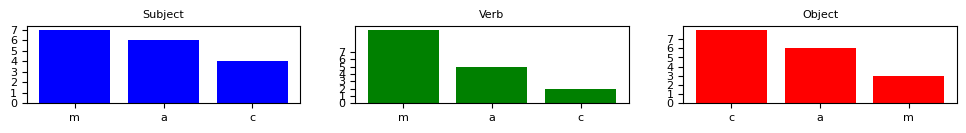

In [15]:
pap_ab.plot_ab_uni_distribution()

## 4.2 bigram abstractness tag -- pap

get all data abstractness tag


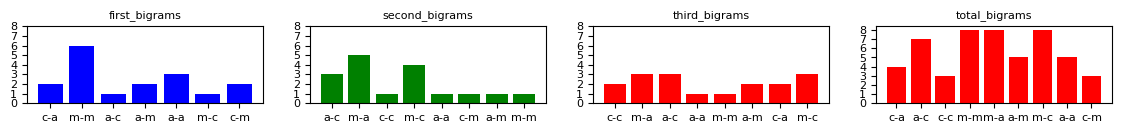

In [16]:
pap_ab. plot_ab_bi_distribution()

## 4.3 tokens and abstractness -- pap

get all data abstractness tag


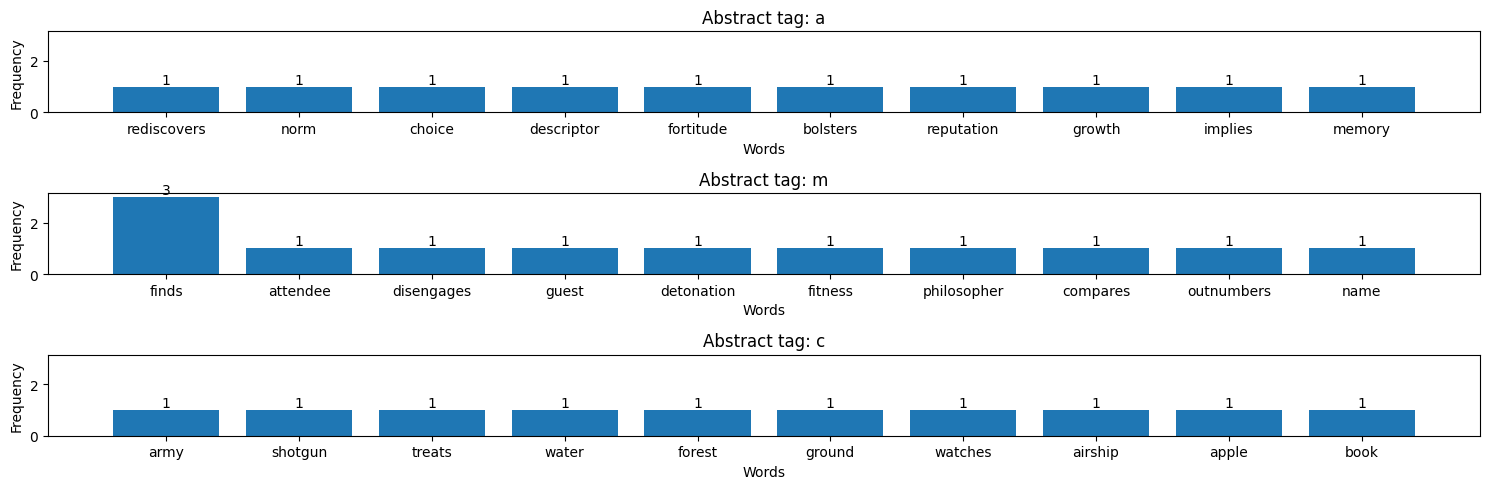

In [17]:
pap_ab.plot_ab_tokens_distribution()